[ 1 az 2 strany ]
1. opis problemu + motivacia
2. opis dat + charakteristiky (zdroj, struktura, format, mnozstva)
    - opisna statistika (median, priemer, outlier, chybajuce hodnoty...)
    - korelacia a zavislosti medzi atributmi
3. definovanie ulohy, predpokladany scenar riesenia
    - klasifikacia - class atribut
    - regresia - atribut, distribucia
    
zdroj dat: https://www.kaggle.com/avikasliwal/used-cars-price-prediction
    

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Nacitanie dat

In [2]:
df = pd.read_csv('data/cars_raw.csv').drop('Unnamed: 0', axis=1)

In [20]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61 Lakh,4.50


## Analyza datasetu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [6]:
df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [9]:
# opis kategorickych atributov
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,4.78 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [10]:
# opis numerickych atributov
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
# vypis najcastejsich hodnot
df.mode()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mahindra XUV500 W8 2WD,Mumbai,2014.0,60000.0,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,5.0,4.78 Lakh,4.5
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.9 kmpl,NaN,NaN,NaN,63.71 Lakh,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.13 Lakh,NaN


## Analyza stlpcov datasetu
- prehlad zastupenia hodnot v datasete

In [8]:
for col in df:
    print(f"{col} [{len(df[col].value_counts())}]")
    print(df[col].value_counts()[:5])
    print()

Name [1876]
Mahindra XUV500 W8 2WD    49
Maruti Swift VDI          45
Maruti Swift Dzire VDI    34
Honda City 1.5 S MT       34
Maruti Swift VDI BSIV     31
Name: Name, dtype: int64

Location [11]
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Name: Location, dtype: int64

Year [22]
2014    797
2015    744
2016    741
2013    649
2017    587
Name: Year, dtype: int64

Kilometers_Driven [3093]
60000    82
45000    70
65000    68
50000    61
70000    60
Name: Kilometers_Driven, dtype: int64

Fuel_Type [5]
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

Transmission [2]
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

Owner_Type [4]
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

Mileage [442]
18.9 kmpl     172
17.0 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
Nam

### Name
- typ vozidla
- 1876 unikatnych hodnot
- v buducnosti moznost extrahovat znacku vozidla (prve slovo)

### Location
- mesto predaja vozidla
- 11 unikatnych hodnot

### Year
- rok vyroby vozidla
- 22 unikatnych hotnot: <1998,2019>

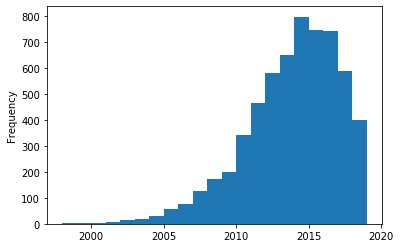

In [65]:
df['Year'].plot.hist(bins = df['Year'].max()-df['Year'].min())

### Kilometers_Driver
- pocet najazdenych kilometrov
- distribucia je najpocetnejsia v desiatkach tisic kilometrov, obsahuje 1 velmi vychylenu hodnotu

(-50000, 400000)

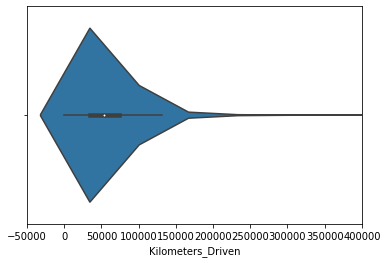

In [88]:
sns.violinplot(x=df["Kilometers_Driven"]).set_xlim(-50000,400000)

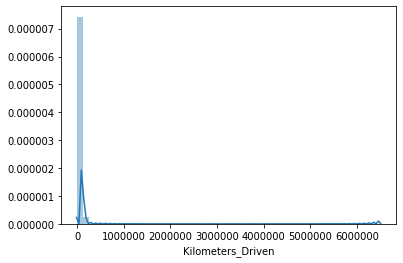

In [115]:
sns.distplot(df["Kilometers_Driven"])

### Fuel_Type
- typ paliva
- 5 unikatnych hodnot

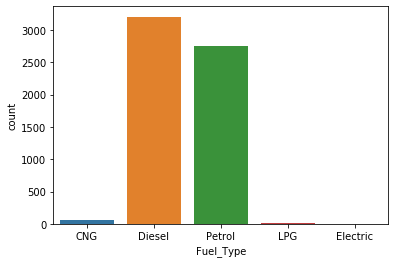

In [101]:
sns.countplot(x="Fuel_Type", data=df)

### Transmission
- typ prevodovky
- 2 unikatne hodnoty

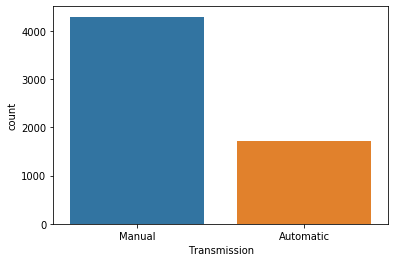

In [102]:
sns.countplot(x="Transmission", data=df)

### Owner_Type
- poradove cislo vlastnika vozidla
- 4 unikatne hodnoty

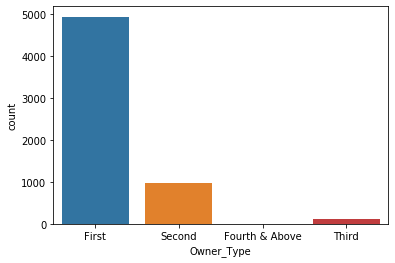

In [103]:
sns.countplot(x="Owner_Type", data=df)

### Mileage
- spotreba vozidla
- 442 unikatnych hodnot
- 2 rozne formaty dat

### Engine
- zdvihovy objem motora
- 146 unikatnych hodnot
- oznacenie na konci

### Power
- vykon vozidla
- 372 unikatnych hodnot
- oznacenie na konci

### Seats
- pocet sedadiel
- 9 unikatnych hodnot v intervale <0,10>

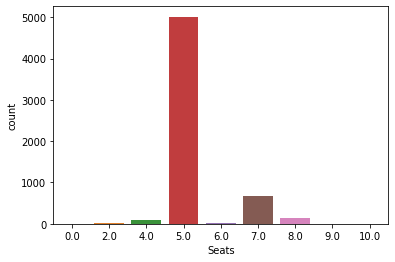

In [105]:
sns.countplot(x="Seats", data=df)

### New_Price
- nova cena vozidla
- vacsina hodnot chyba -> pravdepodobne nepotrebny stlpec

In [107]:
df['New_Price'].isna().sum()

5195

### Price
- cena vozidla (uvedena v tisicoch dolarov)

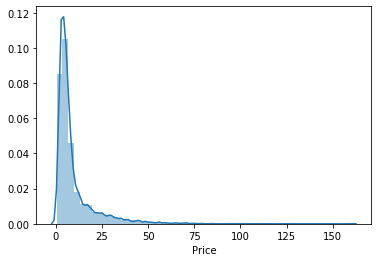

In [23]:
sns.distplot(df["Price"])

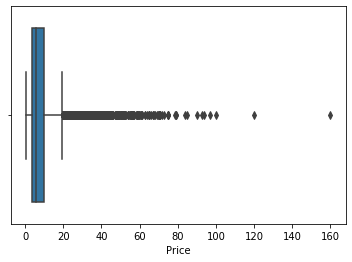

In [21]:
sns.boxplot(df["Price"])

## Popis chyb v stlpcoch
- vozidlo bez sedadiel

In [9]:
df.loc[df['Seats'] == 0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.0


- prilis vychylena hodnota najazdenych kilometrov

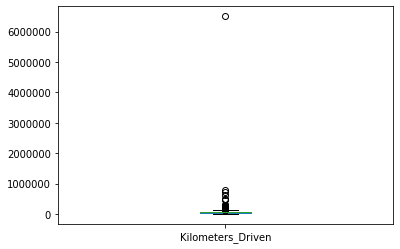

In [116]:
df.plot(kind="box",y="Kilometers_Driven",showfliers=True)

Co spravime s mileage? su tam rozne jednotky kvoli CNG A LPG, odveci by nebolo to zmenit na chapane jednotky l/100km

In [12]:
def delete_strings(columns):
    print(columns)
    for column in columns:
        df[column] = [str(value).split()[0] for value in df[column]]
        for i in range(len(df[column])):
            if df[column][i] == "nan" or df[column][i] == "null":
                df[column][i] = np.NaN
            else:
                try:
                    df[column][i] = int(df[column][i])
                except:
                    df[column][i] = float(df[column][i])

In [ ]:
delete_strings(["Power", "Engine"])

In [14]:
df['Engine'] = pd.to_numeric(df["Engine"])
df['Power'] = pd.to_numeric(df["Power"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null float64
Power                5876 non-null float64
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 611.4+ KB


In [27]:
df.describe()

,Year,Kilometers_Driven,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,5998.000000,560.000000,10.000000,160.000000


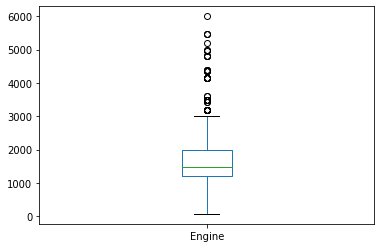

In [30]:
df.plot(kind="box",y="Engine",showfliers=True)

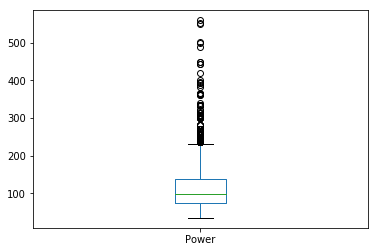

In [26]:
df.plot(kind="box",y="Power",showfliers=True)

In [30]:
df.loc[df['Price'] > 110]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993,255,5.0,2.3 Cr,160.0
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204,560,2.0,NaN,120.0


## Parova analyza

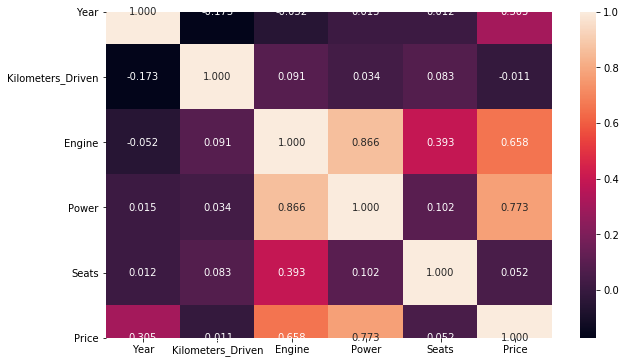

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".3f")

In [18]:
cor = df.corr().abs()
# ziskanie najviac korelovanych parov atributov
s = cor.unstack()
pairs = s.sort_values(kind="quicksort", ascending=False)

print(f"Najviac korelovane atributy ({len(pairs)}):")
best_pairs = pairs[(pairs < 1) & (pairs > 0.3)]
print(best_pairs)

Najviac korelovane atributy (36):
Engine  Power     0.866185
Power   Engine    0.866185
        Price     0.772566
Price   Power     0.772566
        Engine    0.658354
Engine  Price     0.658354
        Seats     0.393337
Seats   Engine    0.393337
Year    Price     0.305327
Price   Year      0.305327
dtype: float64


## Definovanie ulohy OZNAL
- Z vytvorenej teplotnej mapy (heatmap) vieme zistiť závislosti medzi jednotlivými numerickými stĺpcami - vidíme, že od ceny vozidla najviac závisí výkon, zdvihový objem motora a rok výroby vozidla. Tieto atribúty budú mať dôležitú úlohu v našej budúcej predikcii. Zároveň vidíme veľmi silnú závislosť medzi výkonom a zdvihovým objemom motora, čo môže mať negatívny vplyv pri predikcii a pravdepodobne budeme musieť niektorý z týchto dvoch atribútov vynechať 
- Zo získaných údajov vieme vytvoriť niekoľko úloh objavovania znalostí, avšak najrozumnejšia bude predikcia cien vozidiel, ktorú budeme realizovať regresiou, pomocou ktorej budeme predikovať výstupné spojité hodnoty na základe vstupných atribútov